<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#LGBM-training" data-toc-modified-id="LGBM-training-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LGBM training</a></span><ul class="toc-item"><li><span><a href="#Prepare" data-toc-modified-id="Prepare-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Prepare</a></span></li><li><span><a href="#Core" data-toc-modified-id="Core-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Core</a></span></li><li><span><a href="#Feature-importances" data-toc-modified-id="Feature-importances-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Feature importances</a></span></li></ul></li></ul></div>

In [1]:
import taiko as tk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
import lightgbm as lgb

SONG = 1
WHO = 7
TRAIN_ORDER = 3

Using TensorFlow backend.


In [2]:
pfs = []
for drummer in range(WHO, WHO + 1):
    ppf = []
    for order_id in tqdm(range(1, 3 + 1)):
        ppf.append(tk.get_performance(drummer, SONG, order_id).event_primitive_df)
    pfs.append(ppf)

100%|██████████| 3/3 [00:59<00:00, 19.98s/it]


In [3]:
train_df = pfs[0][2]
train_df

,hit_type,R_AAI,R_AVI,R_ASMA,R_GAI,R_GVI,R_GSMA,R_AAE,R_ARE,R_MAMI,...,L_AXYCORR,L_AYZCORR,L_AZXCORR,L_GXYCORR,L_GYZCORR,L_GZXCORR,L1,L2,R1,R2
0,1,0.042448,0.000455,0.058474,5.616789,2.926630,8.224949,0.002257,34.474950,0.044167,...,0.694358,0.597652,0.651768,0.265373,-0.405543,-0.422505,0,0,0,0
1,0,0.038934,0.000077,0.059486,8.436528,4.941726,13.608722,0.001593,76.116728,0.035937,...,-0.366662,0.382972,0.362608,0.797173,-0.607178,-0.759286,1,0,0,0
2,0,0.047208,0.000230,0.066278,8.230620,8.743174,12.533889,0.002459,76.486280,0.049435,...,-0.430708,-0.576248,0.876037,-0.853976,0.756961,-0.973150,0,1,0,1
3,0,0.036436,0.000063,0.049750,4.198721,3.683235,6.653042,0.001391,21.312494,0.034898,...,-0.256964,0.691435,0.262140,-0.704326,-0.469502,0.016972,0,0,1,0
4,1,0.036314,0.000354,0.057000,7.809919,5.503574,11.939125,0.001672,66.498414,0.032967,...,0.269662,-0.056835,0.810148,0.441952,-0.747024,-0.851569,0,0,0,0
5,0,0.035906,0.000149,0.055038,5.869123,6.250268,9.131590,0.001438,40.696871,0.031500,...,0.342245,0.645897,0.797758,-0.738288,0.885628,-0.806185,1,0,0,0
6,0,0.043586,0.000273,0.064833,10.652209,21.873250,15.588611,0.002173,135.342813,0.045170,...,0.051482,0.005048,0.959709,-0.361107,0.482397,-0.882459,0,1,0,1
7,0,0.026322,0.000113,0.037583,4.896511,3.633674,7.255750,0.000805,27.609496,0.025597,...,-0.048114,0.800336,0.470314,-0.725152,-0.732801,0.285802,0,0,1,0
8,1,0.109647,0.000972,0.157333,35.916512,106.068421,60.650667,0.012994,1396.064253,0.110009,...,-0.178857,-0.047954,0.947590,0.649408,-0.915302,-0.836957,0,0,0,1
9,0,0.110716,0.000545,0.170667,32.887962,263.135311,51.933333,0.012804,1344.753324,0.121393,...,0.906836,0.772536,0.595631,-0.789605,0.836057,-0.976435,1,0,1,0


# LGBM training

## Prepare

In [4]:
x = train_df.drop(['hit_type'], axis=1)
y = train_df['hit_type']


x_valid_1 = pfs[0][0].drop(['hit_type'], axis=1)
y_valid_1 = pfs[0][0]['hit_type']

x_valid_2 = pfs[0][1].drop(['hit_type'], axis=1)
y_valid_2 = pfs[0][1]['hit_type']

x_test_1 = x_valid_1.copy()
x_test_2 = x_valid_2.copy()

train_df

,hit_type,R_AAI,R_AVI,R_ASMA,R_GAI,R_GVI,R_GSMA,R_AAE,R_ARE,R_MAMI,...,L_AXYCORR,L_AYZCORR,L_AZXCORR,L_GXYCORR,L_GYZCORR,L_GZXCORR,L1,L2,R1,R2
0,1,0.042448,0.000455,0.058474,5.616789,2.926630,8.224949,0.002257,34.474950,0.044167,...,0.694358,0.597652,0.651768,0.265373,-0.405543,-0.422505,0,0,0,0
1,0,0.038934,0.000077,0.059486,8.436528,4.941726,13.608722,0.001593,76.116728,0.035937,...,-0.366662,0.382972,0.362608,0.797173,-0.607178,-0.759286,1,0,0,0
2,0,0.047208,0.000230,0.066278,8.230620,8.743174,12.533889,0.002459,76.486280,0.049435,...,-0.430708,-0.576248,0.876037,-0.853976,0.756961,-0.973150,0,1,0,1
3,0,0.036436,0.000063,0.049750,4.198721,3.683235,6.653042,0.001391,21.312494,0.034898,...,-0.256964,0.691435,0.262140,-0.704326,-0.469502,0.016972,0,0,1,0
4,1,0.036314,0.000354,0.057000,7.809919,5.503574,11.939125,0.001672,66.498414,0.032967,...,0.269662,-0.056835,0.810148,0.441952,-0.747024,-0.851569,0,0,0,0
5,0,0.035906,0.000149,0.055038,5.869123,6.250268,9.131590,0.001438,40.696871,0.031500,...,0.342245,0.645897,0.797758,-0.738288,0.885628,-0.806185,1,0,0,0
6,0,0.043586,0.000273,0.064833,10.652209,21.873250,15.588611,0.002173,135.342813,0.045170,...,0.051482,0.005048,0.959709,-0.361107,0.482397,-0.882459,0,1,0,1
7,0,0.026322,0.000113,0.037583,4.896511,3.633674,7.255750,0.000805,27.609496,0.025597,...,-0.048114,0.800336,0.470314,-0.725152,-0.732801,0.285802,0,0,1,0
8,1,0.109647,0.000972,0.157333,35.916512,106.068421,60.650667,0.012994,1396.064253,0.110009,...,-0.178857,-0.047954,0.947590,0.649408,-0.915302,-0.836957,0,0,0,1
9,0,0.110716,0.000545,0.170667,32.887962,263.135311,51.933333,0.012804,1344.753324,0.121393,...,0.906836,0.772536,0.595631,-0.789605,0.836057,-0.976435,1,0,1,0


## Core

In [5]:
train_set = lgb.Dataset(x, y)
valid_1_set = lgb.Dataset(x_valid_1, y_valid_1, free_raw_data=False)
valid_2_set = lgb.Dataset(x_valid_2, y_valid_2, free_raw_data=False)
watchlist = [valid_1_set]

params = dict({
    'learning_rate': 0.5,
    'application': 'multiclass',
    'num_classes': 3,
#     'min_data_in_leaf': 5,
#     'max_depth': 8,
    'num_leaves': 2 ** 3,
    'verbosity': 0,
    'metric': 'multi_error'
})

grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [8, 10],
}

model = lgb.train(params, train_set=train_set, valid_sets=watchlist, num_boost_round=200, verbose_eval=5, early_stopping_rounds=100)
# y_pred_1 = model.predict(x_test_1, num_iteration=model.best_iteration)
y_pred_2 = model.predict(x_test_2, num_iteration=model.best_iteration)

watchlist = [valid_2_set]
model = lgb.train(params, train_set=train_set, valid_sets=watchlist, num_boost_round=200, verbose_eval=5, early_stopping_rounds=100)
y_pred_1 = model.predict(x_test_1, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[5]	valid_0's multi_error: 0.110803
[10]	valid_0's multi_error: 0.0969529
[15]	valid_0's multi_error: 0.0831025
[20]	valid_0's multi_error: 0.0692521
[25]	valid_0's multi_error: 0.0609418
[30]	valid_0's multi_error: 0.0581717
[35]	valid_0's multi_error: 0.0498615
[40]	valid_0's multi_error: 0.066482
[45]	valid_0's multi_error: 0.0609418
[50]	valid_0's multi_error: 0.0581717
[55]	valid_0's multi_error: 0.0526316
[60]	valid_0's multi_error: 0.0498615
[65]	valid_0's multi_error: 0.0498615
[70]	valid_0's multi_error: 0.0498615
[75]	valid_0's multi_error: 0.0498615
[80]	valid_0's multi_error: 0.0498615
[85]	valid_0's multi_error: 0.0498615
[90]	valid_0's multi_error: 0.0498615
[95]	valid_0's multi_error: 0.0498615
[100]	valid_0's multi_error: 0.0498615
[105]	valid_0's multi_error: 0.0498615
[110]	valid_0's multi_error: 0.0498615
[115]	valid_0's multi_error: 0.0498615
[120]	valid_0's multi_error: 0.0498615
[125]	valid_0's multi_e

## Feature importances

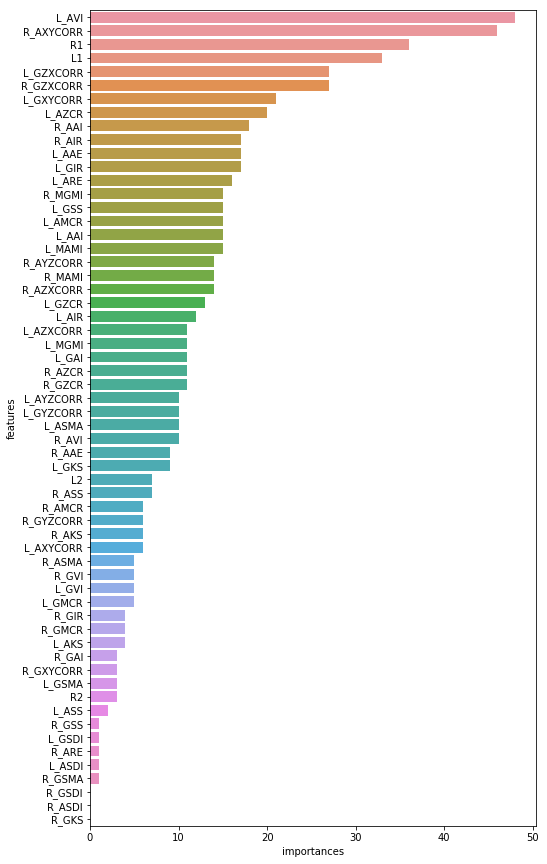

In [6]:
plot_df = pd.DataFrame({'features': train_df.columns[train_df.columns != 'hit_type'],
                        'importances': model.feature_importance()})
plot_df = plot_df.sort_values('importances', ascending=False)

plt.figure(figsize=(8, 15))
sns.barplot(x = plot_df.importances, y = plot_df.features)
plt.show()

In [7]:
y_test = []
for y_pred in [y_pred_1, y_pred_2]:
    predictions = []
    for x in y_pred:
        predictions.append(np.argmax(x))
    y_test.append(pd.Series(data=predictions))

In [8]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

Normalized confusion matrix
[[0.97142857 0.0122449  0.01632653]
 [0.09302326 0.90697674 0.        ]
 [0.13333333 0.         0.86666667]]


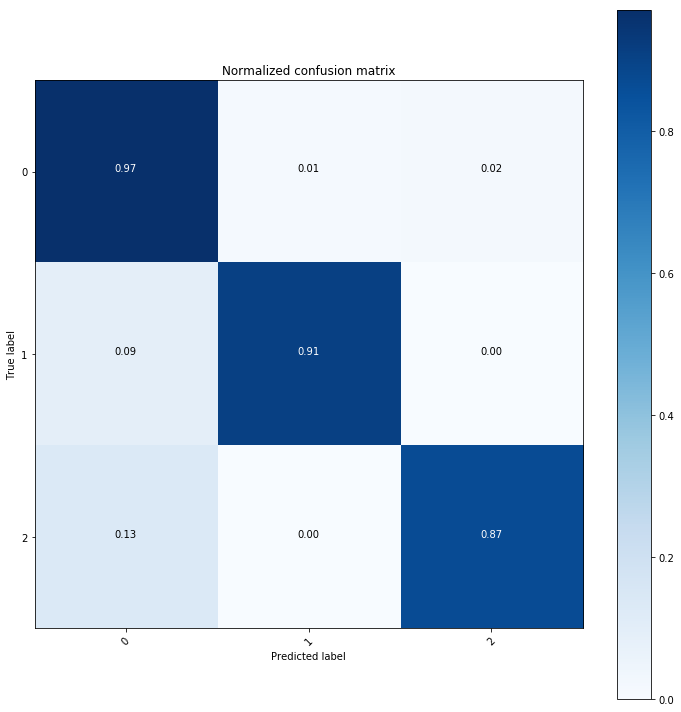

Normalized confusion matrix
[[0.97959184 0.01632653 0.00408163]
 [0.04651163 0.95348837 0.        ]
 [0.1        0.         0.9       ]]


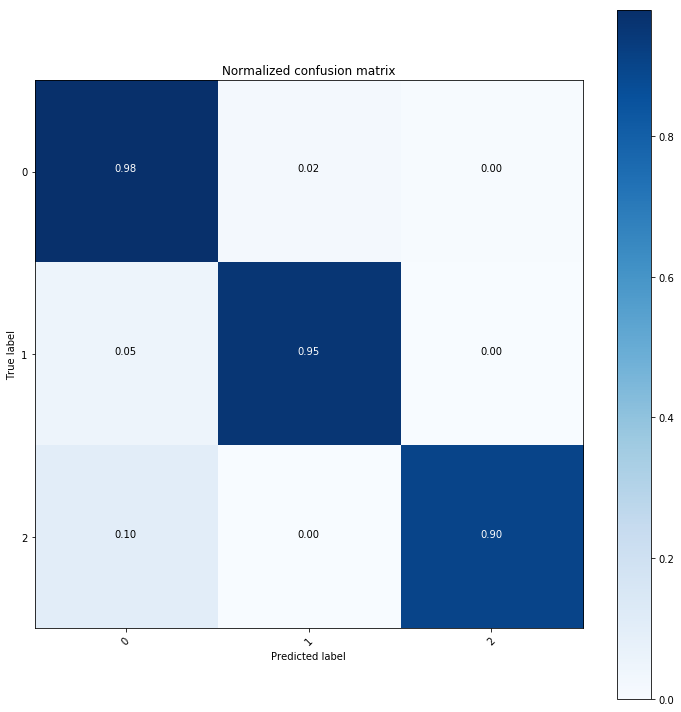

In [10]:
y_valid = [y_valid_1, y_valid_2]
for y_val, y_tst in zip(y_valid, y_test):
    cutstom_output_cnf_matrix(y_val, y_tst)